In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = df['Open'].values

In [5]:
training_set = np.reshape(training_set, (-1,1))

In [6]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scale = sc.fit_transform(training_set)

In [8]:
training_set_scale

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
X_train=[]
y_train=[]

In [10]:
len(training_set)

1258

In [11]:
for i in range(61, 1258):
    X_train.append(training_set_scale[i-61:i, 0])
    y_train.append(training_set_scale[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08497656, 0.08627874,
        0.08471612],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08627874, 0.08471612,
        0.07454052],
       ...,
       [0.92493861, 0.92106928, 0.92438053, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
y_train


array([0.08471612, 0.07454052, 0.07883771, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
X_train = np.reshape(X_train, (len(X_train), len(X_train[0]), 1 ))

In [15]:
X_train.shape[0]

1197

In [16]:
X_train.ndim

3

In [17]:
X_train.shape

(1197, 61, 1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [19]:
RNN = Sequential()

In [20]:
RNN.add(LSTM(units = 61, return_sequences = True, input_shape = (X_train.shape[1], 1) ))

In [21]:
RNN.add(Dropout(0.2))

In [22]:
RNN.add(LSTM(units = 61, return_sequences = True))

In [23]:
RNN.add(Dropout(0.2))

In [24]:
RNN.add(LSTM(units = 61, return_sequences = True))

In [25]:
RNN.add(Dropout(0.2))

In [26]:
RNN.add(LSTM(units = 61, return_sequences = True))
RNN.add(Dropout(0.2))

In [27]:
RNN.add(LSTM(units = 61))
RNN.add(Dropout(0.2))

In [28]:
RNN.add(Dense(units = 1))

In [30]:
RNN.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [34]:
RNN.fit(X_train, y_train, epochs = 161, batch_size = 32)

Epoch 1/161
38/38 [==============================] - 8s 81ms/step - loss: 0.1108
Epoch 2/161
38/38 [==============================] - 3s 81ms/step - loss: 0.0065
Epoch 3/161
38/38 [==============================] - 3s 78ms/step - loss: 0.0049
Epoch 4/161
38/38 [==============================] - 3s 73ms/step - loss: 0.0054
Epoch 5/161
38/38 [==============================] - 3s 77ms/step - loss: 0.0050
Epoch 6/161
38/38 [==============================] - 5s 119ms/step - loss: 0.0049
Epoch 7/161
38/38 [==============================] - 5s 120ms/step - loss: 0.0045
Epoch 8/161
38/38 [==============================] - 5s 124ms/step - loss: 0.0055
Epoch 9/161
38/38 [==============================] - 5s 121ms/step - loss: 0.0042
Epoch 10/161
38/38 [==============================] - 4s 95ms/step - loss: 0.0046
Epoch 11/161
38/38 [==============================] - 4s 104ms/step - loss: 0.0037
Epoch 12/161
38/38 [==============================] - 4s 97ms/step - loss: 0.0039
Epoch 13/161
38/38 [

38/38 [==============================] - 4s 93ms/step - loss: 0.0021
Epoch 101/161
38/38 [==============================] - 4s 93ms/step - loss: 0.0016
Epoch 102/161
38/38 [==============================] - 4s 92ms/step - loss: 0.0018
Epoch 103/161
38/38 [==============================] - 4s 93ms/step - loss: 0.0014
Epoch 104/161
38/38 [==============================] - 3s 92ms/step - loss: 0.0018
Epoch 105/161
38/38 [==============================] - 4s 92ms/step - loss: 0.0013
Epoch 106/161
38/38 [==============================] - 4s 99ms/step - loss: 0.0014
Epoch 107/161
38/38 [==============================] - 4s 104ms/step - loss: 0.0015
Epoch 108/161
38/38 [==============================] - 4s 94ms/step - loss: 0.0013
Epoch 109/161
38/38 [==============================] - 4s 93ms/step - loss: 0.0015
Epoch 110/161
38/38 [==============================] - 3s 91ms/step - loss: 0.0014
Epoch 111/161
38/38 [==============================] - 3s 92ms/step - loss: 0.0014
Epoch 112/161
38/

In [32]:
y_train

array([0.08471612, 0.07454052, 0.07883771, ..., 0.95725128, 0.93796041,
       0.93688146])

In [35]:
df1 = pd.read_csv('Google_Stock_Price_Test.csv')

In [36]:
df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [39]:
training_test = df1['Open'].values

In [70]:
training_test

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [71]:
training_test = np.reshape(training_test, (-1,1))

In [72]:
training_test

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [73]:
dataset_total = pd.concat((df['Open'], df1['Open']), axis = 0)

In [74]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [75]:
inputs = dataset_total[len(dataset_total) - len(training_test) -61:].values

In [76]:
inputs = inputs.reshape(-1,1)

In [77]:
inputs

array([[779.31],
       [779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 

In [78]:
inputs = sc.transform(inputs)

In [79]:
inputs

array([[0.93048218],
       [0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.941

In [80]:
X_test = []
for i in range(61, 81):
    X_test.append(inputs[i-61:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [81]:
X_test.shape

(20, 61, 1)

In [82]:
y_pred = RNN.predict(X_test)

In [83]:
y_pred = sc.inverse_transform(y_pred)

In [84]:
y_pred

array([[773.8827 ],
       [771.4486 ],
       [775.31903],
       [775.9951 ],
       [779.99963],
       [787.00146],
       [789.9193 ],
       [789.0342 ],
       [789.8731 ],
       [791.07965],
       [791.7094 ],
       [791.5144 ],
       [791.2497 ],
       [792.1782 ],
       [792.8319 ],
       [800.22455],
       [806.4098 ],
       [811.67914],
       [811.7714 ],
       [802.73846]], dtype=float32)

In [85]:
training_test

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

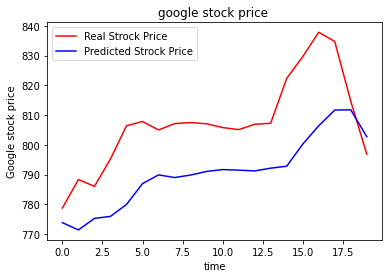

In [97]:
plt.plot(training_test, color='red', label = 'Real Strock Price')
plt.plot(y_pred, color='blue', label = 'Predicted Strock Price')
plt.title("google stock price ")
plt.xlabel('time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()